In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier

In [2]:
transactions_train_df = pd.read_csv("data/transactions_train.csv") # import the transactions dataset

In [3]:
#clean data
transactions_train_df["t_dat"] = pd.to_datetime(transactions_train_df["t_dat"]).dt.strftime("%Y%m%d")
transactions_train_df['t_dat'] = transactions_train_df['t_dat'].values.astype(int)

transactions_train_df['article_id'] = transactions_train_df['article_id'].values.astype(str)
transactions_train_df = transactions_train_df.drop(['sales_channel_id'], axis=1)
transactions_train_df = transactions_train_df[['customer_id', 't_dat', 'price', 'article_id']]
transactions_train_df.set_index('customer_id')

,t_dat,price,article_id
customer_id,,,
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,20180920,0.050831,663713001
000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318,20180920,0.030492,541518023
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,20180920,0.015237,505221004
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,20180920,0.016932,685687003
00007d2de826758b65a93dd24ce629ed66842531df6699338c5570910a014cc2,20180920,0.016932,685687004
...,...,...,...
fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,20200922,0.059305,929511001
fff2282977442e327b45d8c89afde25617d00124d0f99982410630ac51314356,20200922,0.042356,891322004
fff380805474b287b05cb2a7507b9a013482f7dd0bce0e6936f26ea7ecaa68a1,20200922,0.043203,918325001


In [4]:
transactions_train_df.tail(100) #see new orders first.

,customer_id,t_dat,price,article_id
31788224,feede16a97612dbe30e7157dce5797b78cab0eda03e146...,20200922,0.042356,919273002
31788225,feede16a97612dbe30e7157dce5797b78cab0eda03e146...,20200922,0.042356,919273002
31788226,feeea34bc8517c692eed5c4e203d421497f06dc16f79c3...,20200922,0.042356,924243001
31788227,feeea34bc8517c692eed5c4e203d421497f06dc16f79c3...,20200922,0.042356,924243002
31788228,fef6b86939d46de6baee105682c17ed04ab9ac3bab503c...,20200922,0.040576,905957001
...,...,...,...,...
31788319,fff2282977442e327b45d8c89afde25617d00124d0f999...,20200922,0.059305,929511001
31788320,fff2282977442e327b45d8c89afde25617d00124d0f999...,20200922,0.042356,891322004
31788321,fff380805474b287b05cb2a7507b9a013482f7dd0bce0e...,20200922,0.043203,918325001
31788322,fff4d3a8b1f3b60af93e78c30a7cb4cf75edaf2590d3e5...,20200922,0.006763,833459002


In [5]:
transactions_train_df.describe() # see distributions

,t_dat,price
count,3.178832e+07,3.178832e+07
mean,2.019273e+07,2.782927e-02
std,6.487442e+03,1.918113e-02
min,2.018092e+07,1.694915e-05
25%,2.019033e+07,1.581356e-02
50%,2.019082e+07,2.540678e-02
75%,2.020033e+07,3.388136e-02
max,2.020092e+07,5.915254e-01


In [6]:
transaction_sample = transactions_train_df.loc[transactions_train_df['t_dat'] > 20200914] # get a 7 day sample

In [7]:
transaction_sample.head()

,customer_id,t_dat,price,article_id
31521960,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,20200915,0.061000,794321007
31521961,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,20200915,0.050831,875272011
31521962,00040239317e877c77ac6e79df42eb2633ad38fcac09fc...,20200915,0.050831,875272012
31521963,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,20200915,0.011847,800691007
31521964,000749135ee9aa3a24c2316ea5ae4f495b39c1653c5612...,20200915,0.011847,800691007


In [8]:
transaction_sample['t_dat'].size # 266,364 samples to test

266364

In [31]:
transaction_subsample = transaction_sample.sample(n = 10) # take a sub sample for graphing
transaction_subsample.head()

,customer_id,t_dat,price,article_id
31644305,b9c4290d499abc741b2efc1a8a2369a9abcb8773200b95...,20200918,0.040339,919365008
31734769,5a0d0c75ea2bda14feb32d99f693b8ca9457834d2723a0...,20200921,0.011678,798902002
31579233,1b45c0377ed81cb18ec2a644168ed5957070e9b5b6881f...,20200917,0.005068,854151001
31576670,0aa1598e5932a4c1545569fe485c1b4268458b00b30708...,20200917,0.033881,919741001
31787169,f65007f094ad989712b00933b8312a3423d756f281bfd9...,20200922,0.033881,562245102


In [32]:
# Store features and labels in numpy arrays X and y
#customer too long (000058a12d5b43e67d225668fa1f8d618c13dc232df0cad8ffe7ad4a1091e318)
#using index row nums instead
names = transaction_subsample.index

y = transaction_subsample.pop('article_id').values
X = transaction_subsample.values

X[1] # look at some of our feature values

array(['5a0d0c75ea2bda14feb32d99f693b8ca9457834d2723a0adea68eab151257885',
       20200921, 0.0116779661016949], dtype=object)

In [87]:
q = [0.03, 20200919] # customer who buys on 2020-09-22 and wants to spend £1.69

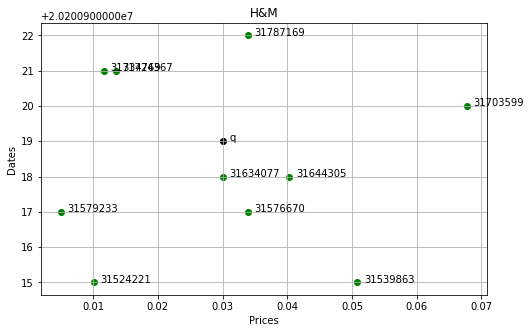

In [88]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

dates = X[:,2]
prices = X[:,1]

plt.figure(figsize=(8,5))
plt.scatter(dates, prices, color='green')

plt.scatter(q[0],q[1],color='black')
plt.annotate('q',(q[0]+0.001,q[1]))

plt.title("H&M")
plt.xlabel("Prices")
plt.ylabel("Dates")
plt.grid()
#plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (dates[i]+0.001, prices[i]))

In [89]:
X[:,1:]

array([[20200918, 0.0403389830508474],
       [20200921, 0.0116779661016949],
       [20200917, 0.0050677966101694],
       [20200917, 0.0338813559322033],
       [20200922, 0.0338813559322033],
       [20200915, 0.0508305084745762],
       [20200918, 0.0300508474576271],
       [20200920, 0.0677796610169491],
       [20200915, 0.0101525423728813],
       [20200921, 0.0135423728813559]], dtype=object)

In [148]:
#Data Normalisation
##we will use N(0,1) rescale with zero mean and unit variance
scaler = preprocessing.StandardScaler().fit(X[:,1:])  #need a handle on the scaler to apply to training and test data
X_scaled = scaler.transform(X[:,1:])

q1 = [20200919,0.03] #had to swap
q_scaled = scaler.transform([q1])

In [149]:
X_scaled

array([[-0.16843038,  0.55813866],
       [ 1.0947975 , -0.94834573],
       [-0.58950634, -1.29579038],
       [-0.58950634,  0.21871196],
       [ 1.51587346,  0.21871196],
       [-1.43165827,  1.10959568],
       [-0.16843038,  0.01737223],
       [ 0.67372154,  2.00047941],
       [-1.43165827, -1.02852526],
       [ 1.0947975 , -0.85034852]])

In [150]:
q_scaled

array([[0.25264558, 0.01469958]])

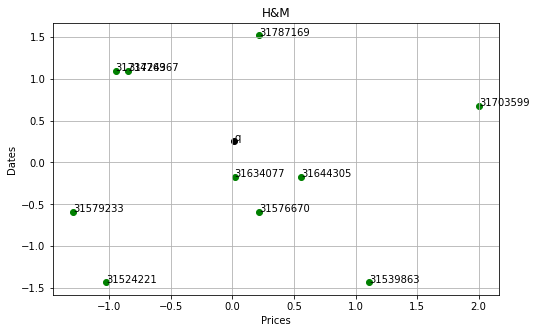

In [151]:
dates = X_scaled[:,1]
prices = X_scaled[:,0]

q_dates = q_scaled[:,1]
q_prices = q_scaled[:,0]

plt.figure(figsize=(8,5))
plt.scatter(dates, prices, color='green')

plt.scatter(q_dates,q_prices,color='black')
plt.annotate('q',(q_dates+0.001,q_prices))

plt.title("H&M")
plt.xlabel("Prices")
plt.ylabel("Dates")
plt.grid()
#plt.legend(handles=[red_patch, blue_patch],loc=4)
for i, txt in enumerate(names):
    plt.annotate(txt, (dates[i]+0.001, prices[i]))

In [152]:
cus_neigh = NearestNeighbors(n_neighbors=2, radius=0.4)
cus_neigh.fit(X_scaled)

NearestNeighbors(n_neighbors=2, radius=0.4)

In [237]:
# Find x nearest neighbours for 31644305
cus = transaction_subsample.loc[[31644305]]
q_cus = cus.iloc[0][1:3]
q_cus = np.array(q_cus, dtype=float)
q_cus#needs to be normalised!

array([2.02009180e+07, 4.03389831e-02])

In [246]:
#neighbours returned where k=2
cus_neigh.kneighbors([q_cus], 2, return_distance=True)

(array([[20200916.48412654, 20200916.90520252]]), array([[4, 9]], dtype=int64))

In [247]:
#get neighbours' names where k=3
q3n = cus_neigh.kneighbors([q_cus], 3)[1][0]
# q3n contains the 'index' of the nearest neighbours
for n in q3n:
    print(names[n])

31787169
31724367
31734769


In [250]:
#who is first neighbour
q_cus_neigh = transactions_train_df.loc[[31787169]]
q_cus_neigh

,customer_id,t_dat,price,article_id
31787169,f65007f094ad989712b00933b8312a3423d756f281bfd9...,20200922,0.033881,562245102


In [281]:
#loop through each neighbour and get products they bought
recommendations = []
for n in q3n:
    df = transactions_train_df.loc[[names[n]]]
    recommendations.append(df.iloc[0]['article_id'])
recommendations

['562245102', '806388001', '798902002']

In [276]:
articles_df = pd.read_csv("data/articles.csv")

In [285]:
for p in recommendations:
    p = int(p)
    item = articles_df.loc[articles_df['article_id'].eq(p), 'detail_desc']
    print(" ")
    print(item)

 
14275    5-pocket jeans in washed, superstretch denim w...
Name: detail_desc, dtype: object
 
81824    Wide T-shirt in soft cotton jersey with a ribb...
Name: detail_desc, dtype: object
 
79732    Small elasticated scrunchies in various designs.
Name: detail_desc, dtype: object
